In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fantasy_21_raw = pd.read_csv ('fantasy_21.csv')
fantasy_22_raw = pd.read_csv ('fantasy_22.csv')
matches_21_raw = pd.read_csv ('matches_21.csv')
matches_22_raw = pd.read_csv ('matches_22.csv')

,Div,Date,GW,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,8/5/22,1,20:00,Crystal Palace,Arsenal,0,2,A,0,...,1.76,0.50,2.09,1.84,2.04,1.88,2.09,1.88,2.03,1.85
1,E0,8/6/22,1,12:30,Fulham,Liverpool,2,2,D,1,...,2.73,1.75,1.90,2.03,1.91,2.02,2.01,2.06,1.89,1.99
2,E0,8/6/22,1,15:00,Bournemouth,Aston Villa,2,0,H,1,...,1.76,0.50,1.93,2.00,1.93,2.00,1.94,2.04,1.88,2.00
3,E0,8/6/22,1,15:00,Leeds,Wolves,2,1,H,1,...,1.87,-0.25,2.08,1.85,2.10,1.84,2.14,1.87,2.08,1.81
4,E0,8/6/22,1,15:00,Newcastle,Nott'm Forest,2,0,H,0,...,1.89,-1.00,1.97,1.96,1.99,1.93,2.19,1.97,2.03,1.86
5,E0,8/6/22,1,15:00,Tottenham,Southampton,4,1,H,2,...,2.31,-1.50,2.07,1.86,2.04,1.88,2.08,1.88,2.03,1.85
6,E0,8/6/22,1,17:30,Everton,Chelsea,0,1,A,0,...,1.77,1.00,1.93,2.00,1.94,1.98,1.94,2.11,1.88,2.00
7,E0,8/7/22,1,14:00,Leicester,Brentford,2,2,D,1,...,1.97,-0.50,1.94,1.99,1.96,1.96,1.96,2.04,1.92,1.96
8,E0,8/7/22,1,14:00,Man United,Brighton,1,2,A,0,...,1.94,-0.75,2.06,1.87,2.05,1.88,2.08,1.97,2.00,1.88
9,E0,8/7/22,1,16:30,West Ham,Man City,0,2,A,0,...,2.62,1.50,1.85,2.08,1.85,2.08,2.00,2.12,1.85,2.04


In [19]:
matches_21 = matches_21_raw[["Date", "Time","HomeTeam", "AwayTeam", 
      "FTHG", "FTAG", "FTR", "Referee", 
      "HS", "AS", "HST", "AST", "HC", "AC", 
      "HY", "AY", "HR", "AR", "B365H", "B365D", "B365A"]]
matches_21 = matches_21.assign(HICT="")
matches_21 = matches_21.assign(AICT="")
matches_21.sort_index(inplace=True)
matches_21 = matches_21.reset_index(drop=True)

In [20]:
matches_22 = matches_22_raw[["Date", "GW","HomeTeam", "AwayTeam", 
      "FTHG", "FTAG", "FTR", "Referee", 
      "HS", "AS", "HST", "AST", "HC", "AC", 
      "HY", "AY", "HR", "AR", "B365H", "B365D", "B365A"]]
matches_22 = matches_22.assign(HICT="")
matches_22 = matches_22.assign(AICT="")
matches_22.sort_index(inplace=True)
matches_22 = matches_22.reset_index(drop=True)

In [21]:
#ICT score dataset
fantasy_21_raw[['Date', 'Time']] = fantasy_21_raw['kickoff_time'].str.split('T', 1, expand=True)
fantasy_21 = fantasy_21_raw[["team", "ict_index", "Date"]] 
fantasy_21 = fantasy_21.sort_values(by=['team', 'Date'])
fantasy_21 = fantasy_21.groupby(by=['team', 'Date'])['ict_index'].sum().to_frame()
ICT_2021 = fantasy_21.pivot_table(index=['team'], 
            columns=['Date'], values='ict_index').fillna(0)
ICT_2021.sort_index(inplace=True)
ICT_2021.reset_index(inplace=True)

In [22]:
#ICT score dataset
fantasy_22 = fantasy_22_raw[["team", "ict_index", "GW"]]  
fantasy_22 = fantasy_22.sort_values(by=['team', 'GW'])
fantasy_22 = fantasy_22.groupby(by=['team', 'GW'])['ict_index'].sum().to_frame()
ICT_2022 = fantasy_22.pivot_table(index=['team'], 
            columns=['GW'], values='ict_index').fillna(0)
ICT_2022.sort_index(inplace=True)
ICT_2022.reset_index(inplace=True)

In [23]:
#was home team dataset
fantasy_21 = fantasy_21_raw[["team", "was_home", "Date"]]
fantasy_21 = fantasy_21.sort_values(by=['team', 'Date'])
WH_2021 = fantasy_21.pivot_table(index=['team'], 
            columns=['Date'], values='was_home').fillna(0)
WH_2021.sort_index(inplace=True)
WH_2021.reset_index(inplace=True)

In [24]:
#was home team dataset
fantasy_22 = fantasy_22_raw[["team", "was_home", "GW"]]
fantasy_22 = fantasy_22.sort_values(by=['team', 'GW'])
WH_2022 = fantasy_22.pivot_table(index=['team'], 
            columns=['GW'], values='was_home').fillna(0)
WH_2022.sort_index(inplace=True)
WH_2022.reset_index(inplace=True)

In [25]:
matches_21['Date'] = pd.to_datetime(matches_21['Date'], format='%m/%d/%y')
matches_21 = matches_21.sort_values(['AwayTeam','Date']).reset_index(drop=True)
matches_21

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Referee,HS,AS,...,AC,HY,AY,HR,AR,B365H,B365D,B365A,HICT,AICT
0,2021-08-13,20:00,Brentford,Arsenal,2,0,H,M Oliver,8,22,...,5,0,0,0,0,4.00,3.40,1.95,,
1,2021-08-28,12:30,Man City,Arsenal,5,0,H,M Atkinson,25,1,...,0,1,2,0,1,1.25,6.00,12.00,,
2,2021-09-18,15:00,Burnley,Arsenal,0,1,A,A Taylor,18,13,...,3,2,1,0,0,3.80,3.60,1.95,,
3,2021-10-02,17:30,Brighton,Arsenal,0,0,D,J Moss,21,8,...,5,2,1,0,0,3.00,3.25,2.40,,
4,2021-10-30,12:30,Leicester,Arsenal,0,2,A,M Oliver,16,9,...,6,2,0,0,0,2.40,3.50,2.87,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2022-02-27,14:00,West Ham,Wolves,1,0,H,A Taylor,13,14,...,5,1,0,0,0,2.05,3.30,3.80,,
366,2022-03-13,14:00,Everton,Wolves,0,1,A,M Oliver,8,14,...,2,2,1,1,0,2.30,3.20,3.30,,
367,2022-04-08,20:00,Newcastle,Wolves,1,0,H,P Bankes,12,5,...,2,1,1,0,0,2.25,3.10,3.40,,
368,2022-04-24,14:00,Burnley,Wolves,1,0,H,A Taylor,14,10,...,6,3,1,0,0,2.70,3.00,2.87,,


In [26]:
matches_22['Date'] = pd.to_datetime(matches_22['Date'], format='%m/%d/%y')
matches_22 = matches_22.sort_values(['AwayTeam','Date']).reset_index(drop=True)
away_team_ict_22 = ICT_2022.mask(WH_2022 == 1.0)
away_team_ict_22 = away_team_ict_22.rename({'team': 'Away Team', 1: 'GW1', 2: 'GW2', 3: 'GW3', 4: 'GW4', 
                            5: 'GW5', 6: 'GW6', 8: 'GW8', 9: 'GW9', 10: 'GW10'}, axis=1) 

In [27]:
away_team_ict_21 = ICT_2021.mask(WH_2021 == 1.0)
away_team_rows_21 =[]
if 'Away Team' in away_team_ict_21.columns:
    away_team_ict_21 = away_team_ict_21.drop('Away Team', axis=1)  
for index, rows in away_team_ict_21.iterrows():
    my_list = [rows["2021-08-13"],rows["2021-08-14"],rows["2021-08-15"],rows["2021-08-21"],
               rows["2021-08-22"],rows["2021-08-23"],rows["2021-08-28"],rows["2021-08-29"],rows["2021-09-11"],
               rows["2021-09-12"],rows["2021-09-13"],rows["2021-09-17"],rows["2021-09-18"],rows["2021-09-19"],
               rows["2021-09-25"],rows["2021-09-26"],rows["2021-09-27"],rows["2021-10-02"],rows["2021-10-03"],
               rows["2021-10-16"],rows["2021-10-17"],rows["2021-10-18"],rows["2021-10-22"],rows["2021-10-23"],
               rows["2021-10-24"],rows["2021-10-30"],rows["2021-10-31"],rows["2021-11-01"],rows["2021-11-05"],
               rows["2021-11-06"],rows["2021-11-07"],rows["2021-11-20"],rows["2021-11-21"],rows["2021-11-27"],
               rows["2021-11-28"],rows["2021-11-30"],rows["2021-12-01"],rows["2021-12-02"],rows["2021-12-04"],
               rows["2021-12-05"],rows["2021-12-06"],rows["2021-12-10"],rows["2021-12-11"],rows["2021-12-12"],
               rows["2021-12-14"],rows["2021-12-15"],rows["2021-12-16"],rows["2021-12-18"],rows["2021-12-19"],
               rows["2021-12-26"],rows["2021-12-27"],rows["2021-12-28"],rows["2021-12-29"],rows["2021-12-30"],
               rows["2022-01-01"],rows["2022-01-02"],rows["2022-01-03"],rows["2022-01-11"],rows["2022-01-12"],
               rows["2022-01-14"],rows["2022-01-15"],rows["2022-01-16"],rows["2022-01-18"],rows["2022-01-19"],
               rows["2022-01-21"],rows["2022-01-22"],rows["2022-01-23"],rows["2022-02-05"],rows["2022-02-08"],
               rows["2022-02-09"],rows["2022-02-10"],rows["2022-02-12"],rows["2022-02-13"],rows["2022-02-15"],
               rows["2022-02-19"],rows["2022-02-20"],rows["2022-02-23"],rows["2022-02-24"],rows["2022-02-25"],
               rows["2022-02-26"],rows["2022-02-27"],rows["2022-03-01"],rows["2022-03-05"],rows["2022-03-06"],
               rows["2022-03-07"],rows["2022-03-10"],rows["2022-03-12"],rows["2022-03-13"],rows["2022-03-14"],
               rows["2022-03-16"],rows["2022-03-17"],rows["2022-03-18"],rows["2022-03-19"],rows["2022-03-20"],
               rows["2022-04-02"],rows["2022-04-03"],rows["2022-04-04"],rows["2022-04-06"],rows["2022-04-08"],
               rows["2022-04-09"],rows["2022-04-10"],rows["2022-04-16"],rows["2022-04-17"],rows["2022-04-19"],
               rows["2022-04-20"],rows["2022-04-21"],rows["2022-04-23"],rows["2022-04-24"],rows["2022-04-25"],
               rows["2022-04-28"],rows["2022-04-30"],rows["2022-05-01"],rows["2022-05-02"],rows["2022-05-07"],
               rows["2022-05-08"],rows["2022-05-10"],rows["2022-05-11"],rows["2022-05-12"],rows["2022-05-15"],
               rows["2022-05-16"],rows["2022-05-17"],rows["2022-05-19"]]
    away_team_rows_21.append(my_list)
flat_list_a21 = []
for sublist_a21 in away_team_rows_21:
    for item in sublist_a21:
        flat_list_a21.append(item)
cleanedList_a21 = [x for x in flat_list_a21 if str(x) != 'nan']
cleanedList_a21 = [x for x in cleanedList_a21 if str(x) != '0.0']
matches_21 = matches_21.assign(AICT=cleanedList_a21)

In [28]:
away_team_rows_22 =[]
if 'Away Team' in away_team_ict_22.columns:
    away_team_ict_22 = away_team_ict_22.drop('Away Team', axis=1)  
for index, rows in away_team_ict_22.iterrows():
    my_list =[rows.GW1, rows.GW2, rows.GW3, rows.GW4, 
              rows.GW5, rows.GW6, rows.GW8, rows.GW9, rows.GW10]
    away_team_rows_22.append(my_list)
flat_list_a22 = []
for sublist in away_team_rows_22:
    for item in sublist:
        flat_list_a22.append(item)
cleanedList_a22 = [x for x in flat_list_a22 if str(x) != 'nan']
cleanedList_a22 = [x for x in cleanedList_a22 if str(x) != '0.0']
matches_22 = matches_22.assign(AICT=cleanedList_a22)

In [29]:
home_team_ict_21 = ICT_2021.mask(WH_2021 == 0.0)

In [30]:
matches_21 = matches_21.sort_values(['HomeTeam','Date']).reset_index(drop=True)
home_team_rows_21 = []
if 'Home Team' in home_team_ict_21.columns:
    home_team_ict_21 = home_team_ict_21.drop('Home Team', axis=1)  
for index, rows in home_team_ict_21.iterrows():
    my_list = [rows["2021-08-13"],rows["2021-08-14"],rows["2021-08-15"],rows["2021-08-21"],
               rows["2021-08-22"],rows["2021-08-23"],rows["2021-08-28"],rows["2021-08-29"],rows["2021-09-11"],
               rows["2021-09-12"],rows["2021-09-13"],rows["2021-09-17"],rows["2021-09-18"],rows["2021-09-19"],
               rows["2021-09-25"],rows["2021-09-26"],rows["2021-09-27"],rows["2021-10-02"],rows["2021-10-03"],
               rows["2021-10-16"],rows["2021-10-17"],rows["2021-10-18"],rows["2021-10-22"],rows["2021-10-23"],
               rows["2021-10-24"],rows["2021-10-30"],rows["2021-10-31"],rows["2021-11-01"],rows["2021-11-05"],
               rows["2021-11-06"],rows["2021-11-07"],rows["2021-11-20"],rows["2021-11-21"],rows["2021-11-27"],
               rows["2021-11-28"],rows["2021-11-30"],rows["2021-12-01"],rows["2021-12-02"],rows["2021-12-04"],
               rows["2021-12-05"],rows["2021-12-06"],rows["2021-12-10"],rows["2021-12-11"],rows["2021-12-12"],
               rows["2021-12-14"],rows["2021-12-15"],rows["2021-12-16"],rows["2021-12-18"],rows["2021-12-19"],
               rows["2021-12-26"],rows["2021-12-27"],rows["2021-12-28"],rows["2021-12-29"],rows["2021-12-30"],
               rows["2022-01-01"],rows["2022-01-02"],rows["2022-01-03"],rows["2022-01-11"],rows["2022-01-12"],
               rows["2022-01-14"],rows["2022-01-15"],rows["2022-01-16"],rows["2022-01-18"],rows["2022-01-19"],
               rows["2022-01-21"],rows["2022-01-22"],rows["2022-01-23"],rows["2022-02-05"],rows["2022-02-08"],
               rows["2022-02-09"],rows["2022-02-10"],rows["2022-02-12"],rows["2022-02-13"],rows["2022-02-15"],
               rows["2022-02-19"],rows["2022-02-20"],rows["2022-02-23"],rows["2022-02-24"],rows["2022-02-25"],
               rows["2022-02-26"],rows["2022-02-27"],rows["2022-03-01"],rows["2022-03-05"],rows["2022-03-06"],
               rows["2022-03-07"],rows["2022-03-10"],rows["2022-03-12"],rows["2022-03-13"],rows["2022-03-14"],
               rows["2022-03-16"],rows["2022-03-17"],rows["2022-03-18"],rows["2022-03-19"],rows["2022-03-20"],
               rows["2022-04-02"],rows["2022-04-03"],rows["2022-04-04"],rows["2022-04-06"],rows["2022-04-08"],
               rows["2022-04-09"],rows["2022-04-10"],rows["2022-04-16"],rows["2022-04-17"],rows["2022-04-19"],
               rows["2022-04-20"],rows["2022-04-21"],rows["2022-04-23"],rows["2022-04-24"],rows["2022-04-25"],
               rows["2022-04-28"],rows["2022-04-30"],rows["2022-05-01"],rows["2022-05-02"],rows["2022-05-07"],
               rows["2022-05-08"],rows["2022-05-10"],rows["2022-05-11"],rows["2022-05-12"],rows["2022-05-15"],
               rows["2022-05-16"],rows["2022-05-17"],rows["2022-05-19"]]
    home_team_rows_21.append(my_list)
flat_list_h21 = []
for sublist_h21 in home_team_rows_21:
    for item in sublist_h21:
        flat_list_h21.append(item)
cleanedList_h21 = [x for x in flat_list_h21 if str(x) != 'nan']
cleanedList_h21 = [x for x in cleanedList_h21 if str(x) != '0.0']
matches_21 = matches_21.assign(HICT=cleanedList_h21)

In [51]:
home_team_ict_22 = ICT_2022.mask(WH_2022 == 0.0)
home_team_ict_22 = home_team_ict_22.rename({'team': 'Home Team', 1: 'GW1', 2: 'GW2', 3: 'GW3', 4: 'GW4', 
                            5: 'GW5', 6: 'GW6', 8: 'GW8', 9: 'GW9', 10: 'GW10'}, axis=1) 

In [52]:
matches_22 = matches_22.sort_values(['HomeTeam','Date'])
home_team_rows_22 =[]
if 'Home Team' in home_team_ict_22.columns:
    home_team_ict_22.drop('Home Team', axis=1)  
for index, rows in home_team_ict_22.iterrows():
    my_list =[rows.GW1, rows.GW2, rows.GW3, rows.GW4, 
              rows.GW5, rows.GW6, rows.GW8, rows.GW9, rows.GW10]
    home_team_rows_22.append(my_list)
flat_list_h22 = []
for sublist_h22 in home_team_rows_22:
    for item in sublist_h22:
        flat_list_h22.append(item)
cleanedList_h22 = [x for x in flat_list_h22 if str(x) != 'nan']
cleanedList_h22 = [x for x in cleanedList_h22 if str(x) != '0.0']
matches_22 = matches_22.assign(HICT=cleanedList_h22)

In [38]:
final_dataset = matches_21.append(matches_22).reset_index(drop = 'TRUE')
final_dataset = final_dataset.sort_values(by='Date').reset_index(drop=True)
final_dataset = final_dataset.drop(['Time','GW'], axis=1)
if 'FTR' in final_dataset.columns:
    final_dataset['Result']=final_dataset['FTR']
    final_dataset = final_dataset.drop('FTR', axis=1)
final_dataset

/var/folders/58/8k0vd_nd0sx6lhr56sh035jm0000gn/T/ipykernel_85138/1193590147.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_dataset = matches_21.append(matches_22).reset_index(drop = 'TRUE')


,Date,HomeTeam,AwayTeam,FTHG,FTAG,Referee,HS,AS,HST,AST,...,HY,AY,HR,AR,B365H,B365D,B365A,HICT,AICT,Result
0,2021-08-13,Brentford,Arsenal,2,0,M Oliver,8,22,3,4,...,0,0,0,0,4.00,3.40,1.95,42.2,64.1,H
1,2021-08-14,Everton,Southampton,3,1,A Madley,14,6,6,3,...,2,0,0,0,1.90,3.50,4.00,68.1,41.2,H
2,2021-08-14,Burnley,Brighton,1,2,D Coote,14,14,3,8,...,2,1,0,0,3.10,3.10,2.45,44.7,62.8,A
3,2021-08-14,Chelsea,Crystal Palace,3,0,J Moss,13,4,6,1,...,0,0,0,0,1.25,5.75,13.00,55.2,26.6,H
4,2021-08-14,Watford,Aston Villa,3,2,M Dean,13,11,7,2,...,3,1,0,0,3.10,3.20,2.37,56.1,41.6,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,2022-10-09,Arsenal,Liverpool,3,2,M Oliver,11,8,7,3,...,1,2,0,0,2.50,3.60,2.62,61.4,43.1,H
453,2022-10-09,Crystal Palace,Leeds,2,1,P Tierney,13,10,5,4,...,3,3,0,0,2.05,3.50,3.60,54.2,46.2,H
454,2022-10-09,West Ham,Fulham,3,1,C Kavanagh,17,8,8,2,...,1,3,0,0,1.72,3.80,4.75,67.6,36.3,H
455,2022-10-09,Everton,Man United,1,2,D Coote,11,12,2,4,...,2,1,0,0,3.60,3.50,2.05,40.1,54.9,A


                        HICT  Away Wins or Draws
HICT                1.000000            0.044307
Away Wins or Draws  0.044307            1.000000


/var/folders/58/8k0vd_nd0sx6lhr56sh035jm0000gn/T/ipykernel_85138/4168150087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df10['Away Wins or Draws']=(df10['Result']!='D').astype(int)


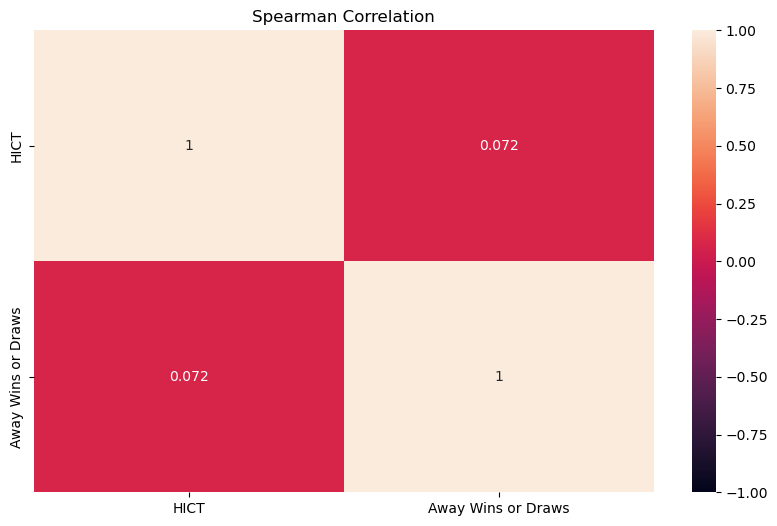

In [50]:
df10 = final_dataset[['Result', 'HICT']]
df10['Away Wins or Draws']=(df10['Result']!='D').astype(int)

my_r = df10.corr(method="spearman")
print(my_r)

def display_correlation(df):
    r = df.corr(method="spearman")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df.corr(), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation")
    return(r)

r_simple=display_correlation(df10)

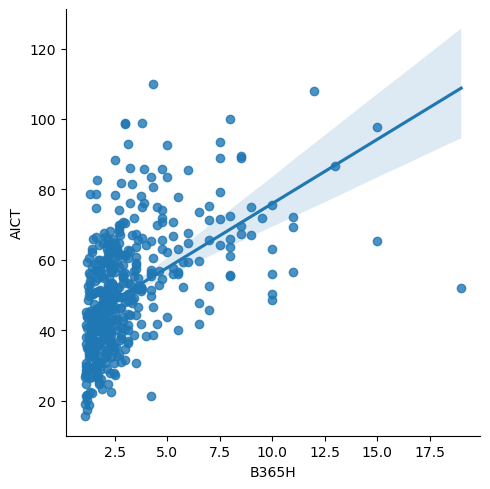

In [54]:
sns.lmplot(x='B365H',y='AICT',data=final_dataset,fit_reg=True)

In [55]:
pd.set_option('display.max_rows', 120)
final_dataset.dtypes

Date        datetime64[ns]
HomeTeam            object
AwayTeam            object
FTHG                 int64
FTAG                 int64
Referee             object
HS                   int64
AS                   int64
HST                  int64
AST                  int64
HC                   int64
AC                   int64
HY                   int64
AY                   int64
HR                   int64
AR                   int64
B365H              float64
B365D              float64
B365A              float64
HICT               float64
AICT               float64
Result              object
dtype: object

In [57]:
final_dataset.Result.describe()

count     457
unique      3
top         H
freq      200
Name: Result, dtype: object

In [59]:
final_dataset.Result.value_counts()

H    200
A    146
D    111
Name: Result, dtype: int64

In [ ]:
ax = final_dataset.hist(column=['Result'],bins=3, figsize=(8,6))


In [61]:
final_dataset.describe()

,FTHG,FTAG,HS,AS,HST,AST,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,HICT,AICT
count,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000
mean,1.571116,1.273523,13.728665,11.761488,4.715536,4.096280,5.592998,4.750547,1.706783,1.776805,0.050328,0.056893,3.033982,4.241685,4.662298,55.789934,50.657768
std,1.412614,1.209257,5.569409,5.231274,2.635378,2.491109,2.975889,2.805681,1.251936,1.211453,0.228661,0.231891,2.315707,1.446432,4.390313,18.011599,16.683519
min,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.060000,2.800000,1.140000,18.100000,15.600000
25%,1.000000,0.000000,9.000000,8.000000,3.000000,2.000000,3.000000,3.000000,1.000000,1.000000,0.000000,0.000000,1.610000,3.400000,2.150000,43.800000,38.200000
50%,1.000000,1.000000,13.000000,11.000000,4.000000,4.000000,5.000000,4.000000,2.000000,2.000000,0.000000,0.000000,2.250000,3.750000,3.250000,54.400000,49.400000
75%,2.000000,2.000000,17.000000,15.000000,6.000000,6.000000,7.000000,6.000000,2.000000,3.000000,0.000000,0.000000,3.400000,4.500000,5.500000,66.700000,60.600000
max,9.000000,6.000000,31.000000,31.000000,15.000000,14.000000,15.000000,16.000000,6.000000,5.000000,2.000000,1.000000,19.000000,13.000000,29.000000,122.200000,110.000000
